In [1]:
import pandas as pd
import numpy as np ,numpy.random
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil.relativedelta import relativedelta
import random
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from scipy.stats import norm

In [5]:
base=pd.read_csv('C:/Users/missi/Documents/Cours M2 MOSEF/Finance/Perf_LO_CB.csv', header=0,parse_dates=True, sep=',')

In [6]:
base.head(3)

,Date,Risque,Rdt_Predit,Rdt_Obs
0,2013-03-31 00:00:00,13.681527,10.880229,-3.920348
1,2013-04-30 00:00:00,3.019808,3.166930,4.262130
2,2013-05-31 00:00:00,3.770025,4.068547,4.228076


In [7]:
base.tail(3)

,Date,Risque,Rdt_Predit,Rdt_Obs
74,2019-05-31 00:00:00,6.100452,5.443549,8.040237
75,2019-06-30 00:00:00,3.314378,3.337724,4.912096
76,2019-07-31 00:00:00,6.487685,5.173414,11.629745


In [8]:
# Dimension des données
base.shape

(77, 4)

In [11]:
base.dtypes

Date           object
Risque        float64
Rdt_Predit    float64
Rdt_Obs       float64
dtype: object

In [12]:
# Renommer les colonnes 
base.columns=['Obs','Risque','Rendement prédit','Rendement observé']

In [13]:
Missing_values=["NaN","N/A"]
print(base.isnull().sum ())

Obs                  0
Risque               0
Rendement prédit     0
Rendement observé    0
dtype: int64


In [14]:
base['Rendement observé'].fillna(base['Rendement observé'].median(), inplace=True)

### Analyse univariée et Visualisation des données

### Statistiques descriptives

In [15]:
base.describe()

,Risque,Rendement prédit,Rendement observé
count,77.000000,77.000000,77.000000
mean,4.927476,4.611042,2.145084
std,2.476247,1.641160,4.831667
min,2.583563,3.027949,-6.841319
25%,3.350213,3.584973,-0.548685
50%,3.965710,3.915706,1.288834
75%,5.773032,5.173414,4.270117
max,13.681527,10.880229,17.828951


In [17]:
# Calcul de coefficient d'asymétie
from scipy.stats import kurtosis
from scipy.stats import skew
skewness=base.skew() 
kurtosis=base.kurtosis()
df=pd.DataFrame({'skewness':skewness, 'kurtosis': kurtosis})
df

,skewness,kurtosis
Risque,1.746036,2.486920
Rendement prédit,1.905988,3.425214
Rendement observé,0.799028,1.350069


Text(0.5, 1.0, 'Boîtes à moustache de la composition du portefeuille Long_Only_CB')

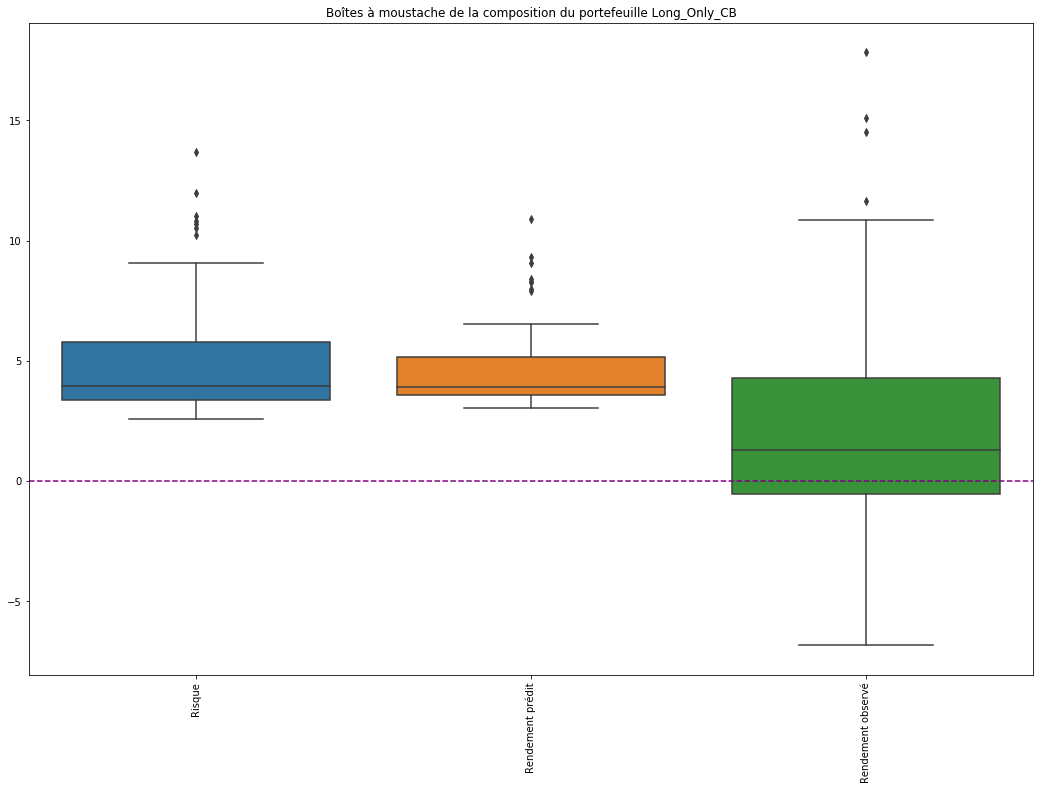

In [18]:
fig, ax = plt.subplots(figsize=(18,12))
sns.boxplot(data=base.iloc[:,1:4])
#sns.swarmplot(x='Titres', y='Return', data=db, color="grey")
plt.axhline(0, ls='--',color="purple")
plt.xticks(rotation=90)
plt.title("Boîtes à moustache de la composition du portefeuille Long_Only_CB")

### Histogrammes

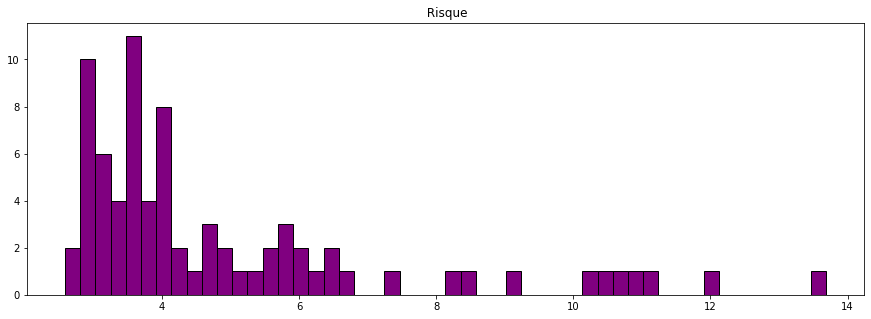

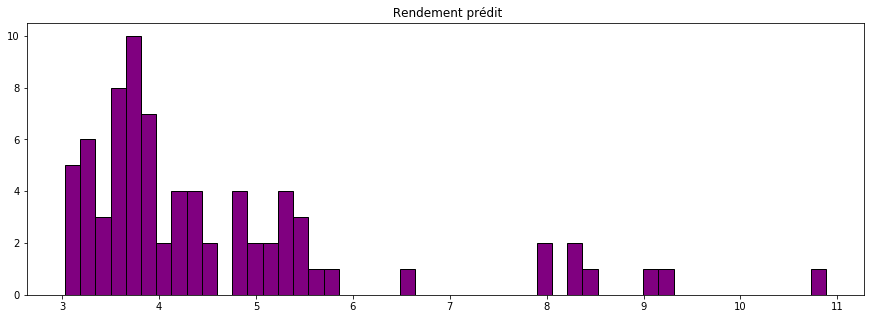

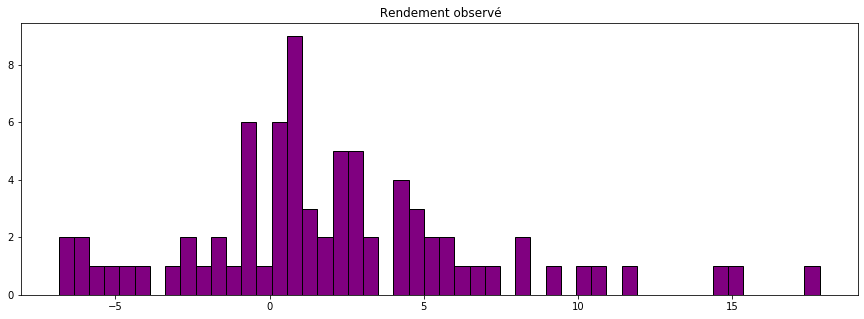

In [19]:
for i in list(base.columns[1:4]):
    fig = plt.figure(figsize=(15,5))
    plt.hist(base[i], bins=50,color='purple',edgecolor = 'black')
    plt.title(" {}".format(i))


### Test de normalité Jarques-Bera

In [20]:
# normality test
from scipy.stats import shapiro
# interpret
for i in list(base.columns[1:4]):
    stat, p = shapiro(base[i])
    print(i,':', 'Statistics=%.3f, p=%.3f' % (stat, p))
    print(50*'*')

Risque : Statistics=0.774, p=0.000
**************************************************
Rendement prédit : Statistics=0.770, p=0.000
**************************************************
Rendement observé : Statistics=0.951, p=0.005
**************************************************


### Corrélations 

In [21]:
corr=base.corr()
corr.style.background_gradient(cmap='PuOr')

,Risque,Rendement prédit,Rendement observé
Risque,1,0.801692,0.113152
Rendement prédit,0.801692,1,0.00907389
Rendement observé,0.113152,0.00907389,1


### Autocorrélations

#### Calcul des autocorrélations  des rendements observés

In [22]:
from statsmodels.tsa.stattools import acf
cor = acf(base["Rendement observé"])
cor

C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


array([ 1.00000000e+00, -3.54796909e-02, -7.92919614e-03,  5.95974879e-02,
       -3.19989263e-02,  1.53648063e-02, -8.96058004e-02,  9.89999620e-02,
        1.34418249e-01,  1.05822933e-01, -1.50977209e-01,  9.63714978e-02,
       -6.72962173e-02, -8.64597327e-02, -1.18197302e-02, -8.69641725e-02,
       -3.58482369e-02,  3.74239880e-02, -2.24722515e-02, -9.59458470e-02,
       -3.78564920e-02,  5.40493979e-03, -5.28163933e-02, -4.90568409e-02,
       -2.07305276e-02,  2.01162702e-01,  5.30247426e-02,  1.28774041e-03,
        1.79841874e-01, -2.44778900e-02, -1.47176771e-02,  7.11921119e-04,
        3.87903422e-03,  2.47020589e-02,  7.23887649e-03,  2.65481832e-02,
        1.14406164e-01,  1.00756899e-02, -1.03296791e-01,  4.78765939e-02,
       -2.35223331e-03])

Text(0.5, 1.0, 'Autocorrélation partielle des rendements observés')

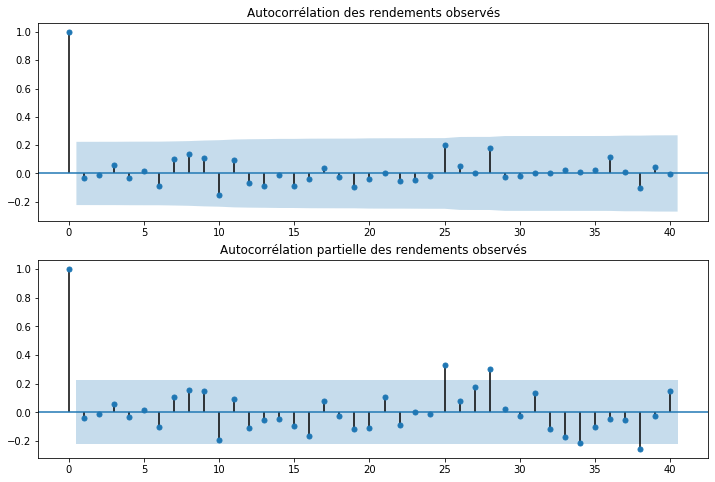

In [24]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Autocorrélation des rendements 
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(base["Rendement observé"], lags=40, ax=ax1)
plt.title("Autocorrélation des rendements observés") 

# Autocorrélation partielle des rendements 
ax2 = fig.add_subplot(212)
fig = plot_pacf(base["Rendement observé"], lags=40, ax=ax2)
plt.title("Autocorrélation partielle des rendements observés") 

#### Calcul des autocorrélations  des rendements prédits

In [25]:
from statsmodels.tsa.stattools import acf
cor =acf(base["Rendement prédit"])
cor

array([ 1.        ,  0.00344185, -0.07046523,  0.05592878,  0.05704019,
       -0.06202253, -0.16937093, -0.0616371 ,  0.00218054, -0.08798923,
        0.06162295,  0.02849167,  0.15748087,  0.22401513, -0.02149554,
       -0.06140941, -0.02185069, -0.11351106, -0.18150434, -0.09601479,
       -0.11813364, -0.13698949,  0.10840456,  0.10743318, -0.03394961,
       -0.0429559 ,  0.13590867,  0.03802753, -0.1190646 , -0.05082375,
       -0.11935422, -0.09630611, -0.08846813, -0.04171526, -0.06354941,
        0.13742066, -0.01135296,  0.03850168,  0.0534809 ,  0.07722865,
       -0.03631951])

C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


Text(0.5, 1.0, 'Autocorrélation partielle des rendements prédits')

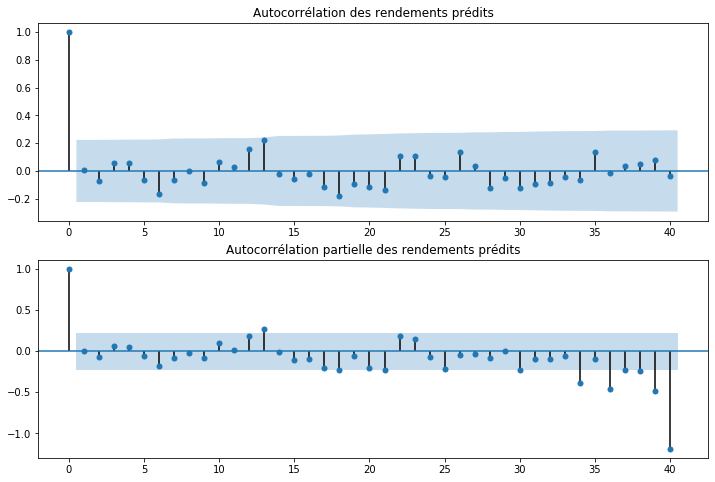

In [26]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Autocorrélation des rendements 
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(base["Rendement prédit"], lags=40, ax=ax1)
plt.title("Autocorrélation des rendements prédits") 

# Autocorrélation partielle des rendements 
ax2 = fig.add_subplot(212)
fig = plot_pacf(base["Rendement prédit"], lags=40, ax=ax2)
plt.title("Autocorrélation partielle des rendements prédits")

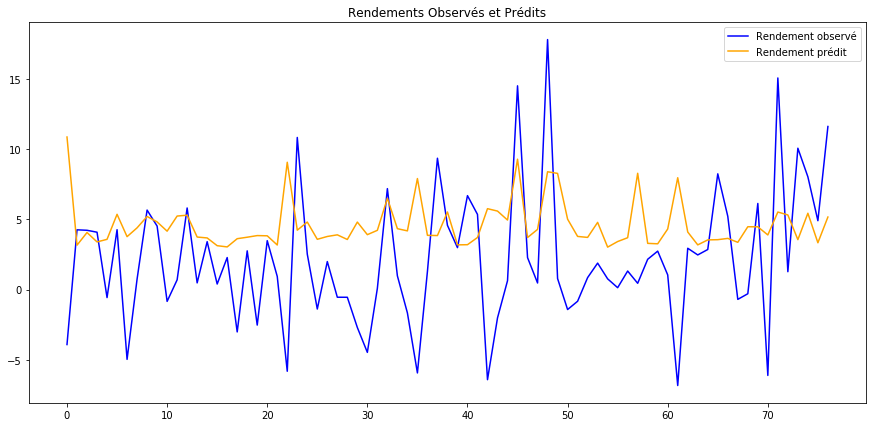

In [36]:
fig = plt.figure(figsize=(15,7))
plt.plot(base["Rendement observé"], "k",color="blue")
plt.plot(base["Rendement prédit"], "k",color="orange")
plt.title("Rendements Observés et Prédits")
plt.legend(("Rendement observé","Rendement prédit"))

### Calcul des Value at risk

##### Historical Simulation approach:
We calculate the VaR for 90, 95, and 99 confidence levels. This function has three parameters: probability, mean, and standard deviation. In probability, we use 0.1, 0.05, 0.01 respectively for the VaR(90), VaR(95), and VaR(99).

#### Rendements observés

In [28]:
mean = np.mean(base['Rendement observé'])
std_dev = np.std(base['Rendement observé'])

C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_core.py:2477: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(values, bins=bins, **kwds)


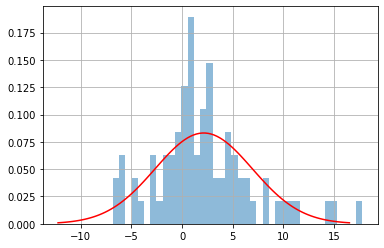

In [29]:
base['Rendement observé'].hist(bins=40, normed=True, histtype='stepfilled', alpha=0.5)
x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 100)
plt.plot(x,norm.pdf(x, mean, std_dev), "r" )
plt.show()

In [30]:
#VaR Computation 
VaR_90 = norm.ppf(1-0.9, mean, std_dev)
VaR_95 = norm.ppf(1-0.95, mean, std_dev)
VaR_99 = norm.ppf(1-0.99, mean, std_dev)

print('VaR 90% Confidence Level:   ', VaR_90)
print('VaR 95% Confidence Level:   ', VaR_95)
print('VaR 99% Confidence Level:   ', VaR_99)

VaR 90% Confidence Level:    -4.0066073428293025
VaR 95% Confidence Level:    -5.750526381210924
VaR 99% Confidence Level:    -9.021828469188062


#### Rendements prédits

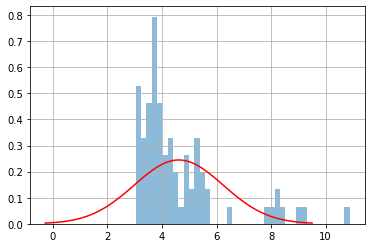

In [31]:
mean = np.mean(base["Rendement prédit"])
std_dev = np.std(base["Rendement prédit"])
base["Rendement prédit"].hist(bins=40,normed=True, histtype='stepfilled',alpha=0.5)
x= np.linspace(mean-3*std_dev,mean+3*std_dev,100)
plt.plot(x,norm.pdf(x,mean,std_dev),"r")
plt.show()

In [32]:
VaR_90 = norm.ppf(1-0.9, mean, std_dev)
VaR_95 = norm.ppf(1-0.95, mean, std_dev)
VaR_99 = norm.ppf(1-0.99, mean, std_dev)

print('VaR 90% Confidence Level:   ', VaR_90)
print('VaR 95% Confidence Level:   ', VaR_95)
print('VaR 99% Confidence Level:   ', VaR_99)

VaR 90% Confidence Level:    2.521512562564086
VaR 95% Confidence Level:    1.9291599505173975
VaR 99% Confidence Level:    0.8180049634112794


C:\Users\missi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  after removing the cwd from sys.path.


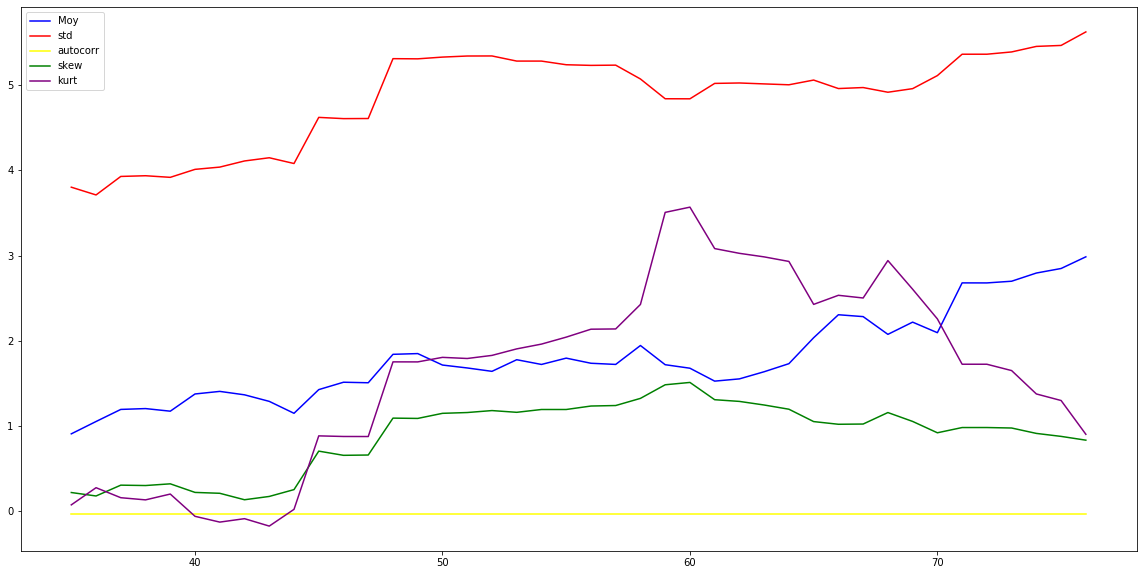

In [35]:
data=pd.DataFrame()
data['Meanrolling']=base['Rendement observé'].rolling(36).mean()
data['Stdrolling']=base['Rendement observé'].rolling(36).std()
data['Autocorrolling']=base['Rendement observé'].rolling(36).apply(lambda x : pd.Series.autocorr(base['Rendement observé']))
data['Skewrolling']=base['Rendement observé'].rolling(36).skew()
data['Kurtrolling']=base['Rendement observé'].rolling(36).kurt()
df=data.dropna()
df

len(df)

plt.figure(figsize=(20,10))
plt.plot(data.index,data["Meanrolling"].values,c="blue")
plt.plot(data.index,data["Stdrolling"].values,c="red")
plt.plot(data.index,data["Autocorrolling"].values,c="yellow")
plt.plot(data.index,data["Skewrolling"].values,c="green")
plt.plot(data.index,data["Kurtrolling"].values,c="purple")
plt.legend(("Moy","std","autocorr","skew","kurt"))
plt.show()